<a href="https://colab.research.google.com/github/Vishruth-N/AE102/blob/main/AE102_Assignment_Vishruth_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AE 102 Assignment
### Name: Vishruth N
### Roll Number: 200010088
---





In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab

# Question 1

### Part (i)

```xbar``` is the sample mean $\bar{x}$

True mean $\mu$ and true standard deviation $\sigma$ for a uniform distribution($f(x) = 1$)
over the interval [0, 1] is:

* Mean($\mu$)= ```mu``` = $\frac{1}{2}$
* Standard Deviation($\sigma$) = ```sig``` = $\sqrt\frac{1}{12}$

In [167]:
def computez(xbar,n): #Function to compute Z
  mu = 0.5
  sig = np.sqrt(1/12)
  z = (np.sqrt(n)*(xbar - mu))/sig
  return z

Computing and plotting the Histogram of $z$ for various values of $N$

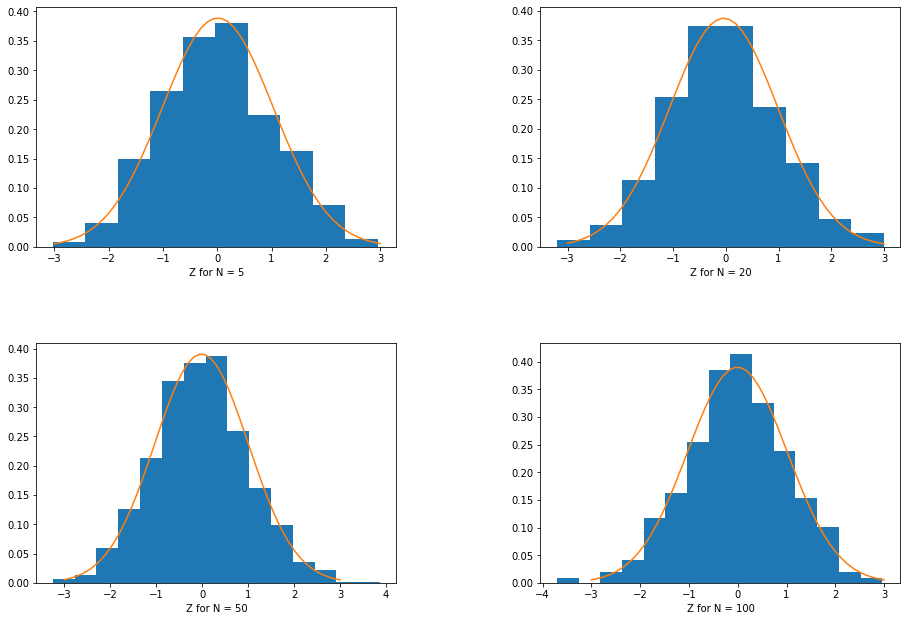

In [168]:
m = 1000
def zhist(n): # Histogram generator function
  z_hist = []
  for i in range(m):
    xbar = np.mean(np.random.random(n)) #returns mean of uniform discrete random variable
    z_hist.append(computez(xbar,n))  
  return z_hist

def hisplot(i,n,bins): #Function to plot the histograms    
  plt.subplot(2, 2, i)
  zh = np.array(zhist(n))
  plt.hist(zh, density = True, bins = bins);
  x = np.linspace(-3,3)
  plt.plot(x, norm.pdf(x, loc = zh.mean(), scale = zh.std()))
  plt.xlabel('Z for N = {}'.format(n))

#Plotting the Histograms
plt.figure(figsize=(15,10)) 
hisplot(1,5,10)
hisplot(2,20,10)
hisplot(3,50,15)
hisplot(4,100,15)


#Spacing
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

### Conclusion:
From the above plots, it can be concluded that the Histograms resemble the Gaussian and remain similar to each other for $N$ = $5,20,50,100$

### Part (ii)

We know that,
 For a Binomial Distribution:
 * Mean($\mu$) = $np$
 * Standard Deviation($\sigma$) = $\sqrt{np(1-p)}$
 

---
The formula for calculating $z$ thus becomes: $(\sqrt\frac{N}{100p(1-p)})$ $\cdot$ $(\frac{\bar{x}}{100} - p)$


#### Function to Create a Binomial Random Variable and generate $z$ 

In [169]:
import scipy
def binz(p,N): # Function to generate a Binomial distribution
  z = []
  for i in range(1000):
    bin_rv = scipy.stats.binom.rvs(100,p,size = N) #returns a binomial discrete random variable
    xbar = np.mean(bin_rv)
    z.append(np.sqrt(N/(100*p*(1-p)))*((xbar/100)-p))
  return z  

In [170]:
import ipywidgets as wi
def binhisplot(i,n,bins,p=0.5):    #Function to plot the histograms 
  plt.subplot(2, 2, i)
  zh = np.array(binz(p,n))
  plt.hist(zh, density = True, bins = bins);
  plt.xlabel('Z for N = {}'.format(n))
  plt.ylabel('frequency')
  x = np.linspace(-0.03,0.03)
  plt.plot(x, norm.pdf(x, loc = zh.mean(), scale = zh.std()))
  
#Plotting the Histograms
wi.interact(binhisplot,p = (0.1,0.9,0.1), i = wi.fixed(1), n = wi.fixed(5), bins = wi.fixed(10))
wi.interact(binhisplot,p = (0.1,0.9,0.1), i = wi.fixed(2), n = wi.fixed(20), bins = wi.fixed(10))
wi.interact(binhisplot,p = (0.1,0.9,0.1), i = wi.fixed(3), n = wi.fixed(50), bins = wi.fixed(15))
wi.interact(binhisplot,p = (0.1,0.9,0.1), i = wi.fixed(4), n = wi.fixed(100), bins = wi.fixed(15))

#Spacing
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)


interactive(children=(FloatSlider(value=0.5, description='p', max=0.9, min=0.1), Output()), _dom_classes=('wid…

interactive(children=(FloatSlider(value=0.5, description='p', max=0.9, min=0.1), Output()), _dom_classes=('wid…

interactive(children=(FloatSlider(value=0.5, description='p', max=0.9, min=0.1), Output()), _dom_classes=('wid…

interactive(children=(FloatSlider(value=0.5, description='p', max=0.9, min=0.1), Output()), _dom_classes=('wid…

<Figure size 432x288 with 0 Axes>

The above plots show that the Histograms fairly resemble the Gaussian/The normal distribution.

## Part (iii)

Let us take the Poisson's distribution and perform the same experiment as above.

We know that,For Poisson's Distribution:
* Mean($\mu$) = $\lambda$
* Standard Deviation($\sigma$) = $\sqrt{\lambda}$

Therefore,
$z$ = $(\sqrt\frac{N}{\lambda})$$\cdot$$(\bar{x} - \lambda)$

In [171]:
from scipy.stats import poisson

In [172]:
def poiz(lam,N): #Function to generate a Poisson's Distribution
  z = []
  for i in range(1000):
    pois_rv = scipy.stats.poisson.rvs(100,lam,size = N)
    xbar = np.mean(pois_rv)
    z.append(np.sqrt(N/lam)*(xbar-lam))
  return z  

Now Let's plot the Histograms

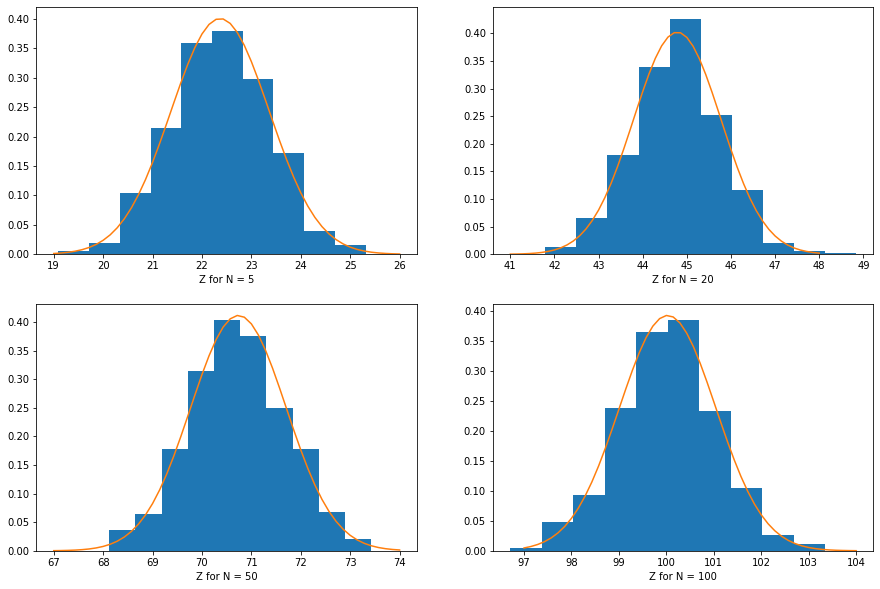

In [173]:
def poihisplot(i,n,bins,lam=100,lin=0):    #function to plot the histograms
  plt.subplot(2, 2, i)
  zh = np.array(poiz(lam,n))
  plt.hist(zh, density = True, bins = bins);
  plt.xlabel('Z for N = {}'.format(n))
  x = np.linspace(lin-3.5,lin+3.5)
  plt.plot(x, norm.pdf(x, loc = zh.mean(), scale = zh.std()))

#Plotting the Histograms
plt.figure(figsize=(15,10))  
poihisplot(1,5,10,100,22.5)
poihisplot(2,20,10,100,44.5)
poihisplot(3,50,10,100,70.5)
poihisplot(4,100,10,100,100.5)

From the above plots, Now we can conclude that these histograms also resemble the Gaussian/Normal Distribution hence Verifying the "Central Limit Theorem"!!

---

# Question 2

## Part(i)

Prime Number  | No. of favourable outcomes
-------------------|------------------
2    | 1
3    | 2
5    | 4
7    | 6
11   | 10
13   | 12
17   | 12
19   | 12
23   | 10
29   | 4
31   | 2




### Total no.of favourable outcomes: $75$ and Total outcomes: $240$.
---
Therefore Probability = $\frac{75}{240}$ = $0.3125$

## Part (ii)

Function to determine whether a number is prime:

In [174]:
def primecheck(n): #Function to check whether a number is prime
  if n >= 2:
    for y in range(2,n):
      if not ( n % y ):
        return False
  else:
    return False
  return True  
  

Computing the probability:

In [175]:
def prob(dode,icos): #Function that computes the probability that the sum of a roll is prime
  sum = dode+icos
  n_primesum = 0
  for i in range(sum.size):
    if primecheck(sum[i]):
      n_primesum += 1
  return n_primesum/sum.size    

In [176]:
print("The probability for n = 1000 throws is",prob(np.random.randint(low = 1, high = 13, size = 1000),np.random.randint(low = 1, high = 21, size = 1000)))
print("The probability for n = 10000 throws is",prob(np.random.randint(low = 1, high = 13, size = 10000),np.random.randint(low = 1, high = 21, size = 10000)))
print("The probability for n = 100000 throws is",prob(np.random.randint(low = 1, high = 13, size = 100000),np.random.randint(low = 1, high = 21, size = 100000)))

The probability for n = 1000 throws is 0.313
The probability for n = 10000 throws is 0.3124
The probability for n = 100000 throws is 0.31277


As we can see from the above output, the computed value gets closer and closer to the true value(i.e 0.3125) as the number of throws increases

## Part (iii)

In [177]:
#THIS CELL TAKES 23s TO EXECUTE
nt = 10000
ne = 1000
probabilities = []
for i in range(ne):
  probabilities.append(prob(np.random.randint(low = 1, high = 13, size = nt),np.random.randint(low = 1, high = 21, size = nt))) #Build the histogram of probabilities

Now, Let's plot the Histogram of Probabilities

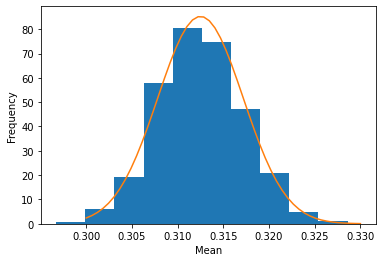

In [178]:
plt.hist(probabilities, density = True);
x = np.linspace(0.3,0.33)
plt.plot(x, norm.pdf(x, loc = np.array(probabilities).mean(), scale = np.array(probabilities).std()));
plt.xlabel("Mean")
plt.ylabel("Frequency");

Seeing the above plot, we can conclude that it indeed centers around the true mean(i.e = $0.3125$).

## Part (iv)

Computing the mean($\mu$) and standard deviation($\sigma$) of the above distribution:

In [179]:
mean = np.array(probabilities).mean()
stdev = np.array(probabilities).std()
print("The Mean of the distribution is {} and the standard deviation is {}".format(mean,stdev))

The Mean of the distribution is 0.31250350000000005 and the standard deviation is 0.0046791171977201


## Part(v)

### Function that returns the Sampling mean and Sampling Variance

In [180]:
def smeanvar(nes = 100, nt = 10000): #Function that returns the Sampling mean and Sampling Variance as an list of size 2
  s_probabilities = []
  for i in range(nes):
    s_probabilities.append(prob(np.random.randint(low = 1, high = 13, size = nt),np.random.randint(low = 1, high = 21, size = nt)))
  s_mean = np.array(s_probabilities).mean()
  s_var = np.array(s_probabilities).var()
  return [s_mean,s_var]


In [181]:
#THIS CELL TAKES 4 MINUTES TO EXECUTE
meanvar = []
for i in range(100):
  meanvar.append(smeanvar()) #generates list of values of sampling mean and variance 

Text(0, 0.5, 'Frequency')

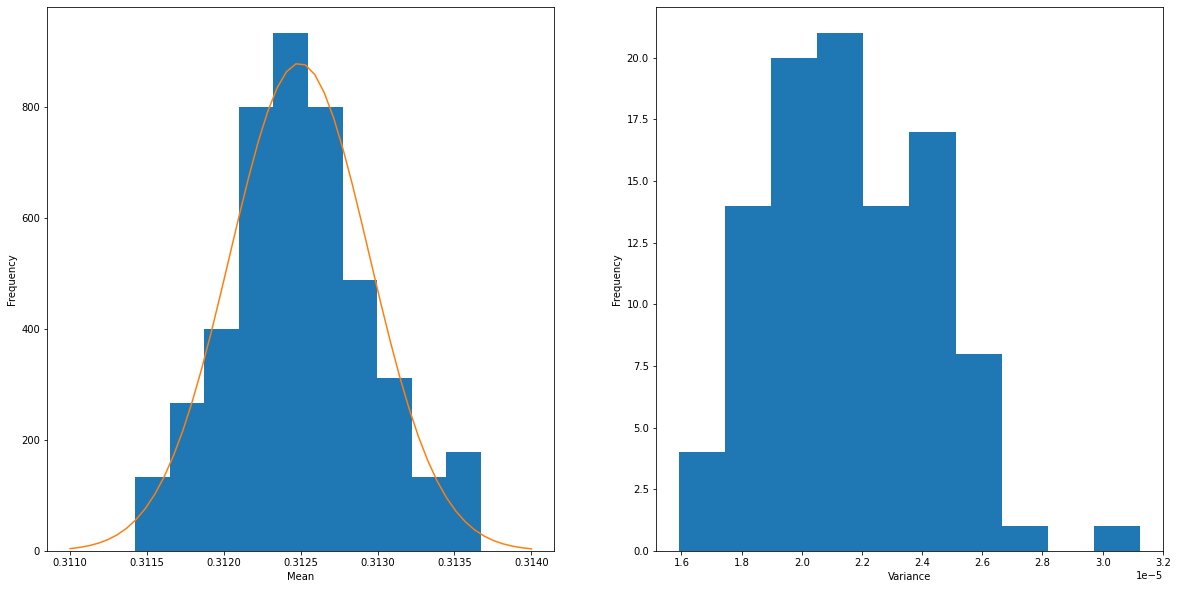

In [182]:
meanvar = np.array(meanvar)
plt.figure(figsize=(20,10))  
plt.subplot(1,2,1)
plt.hist(meanvar[:,0], density = True);
x1 = np.linspace(0.3110,0.3140)
plt.plot(x1, norm.pdf(x1, loc = np.array(meanvar[:,0]).mean(), scale = np.array(meanvar[:,0]).std()));
plt.xlabel("Mean")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(meanvar[:,1]); #The range is x axis is (1.5,3)* 1e-5 , which implies that The sample Variance is extremely small.
plt.xlabel("Variance")
plt.ylabel("Frequency")

## Part (vi)

Computing the The Mean of the 'sampling distribution of the sample mean' and the standard deviation 

In [183]:
meanvar = np.array(meanvar)
mean_sampling = np.array(meanvar[:,0]).mean()
std_sampling = np.array(meanvar[:,0]).std()
print("The Mean of the sampling distribution of the sample mean is {} and the standard deviation is {}".format(mean_sampling,std_sampling))

The Mean of the sampling distribution of the sample mean is 0.31249273 and the standard deviation is 0.00045382776149107394


### This verifies our Hypothesis that the mean = $0.3125$.

## Part (vii)

Text(0, 0.5, 'Frequency')

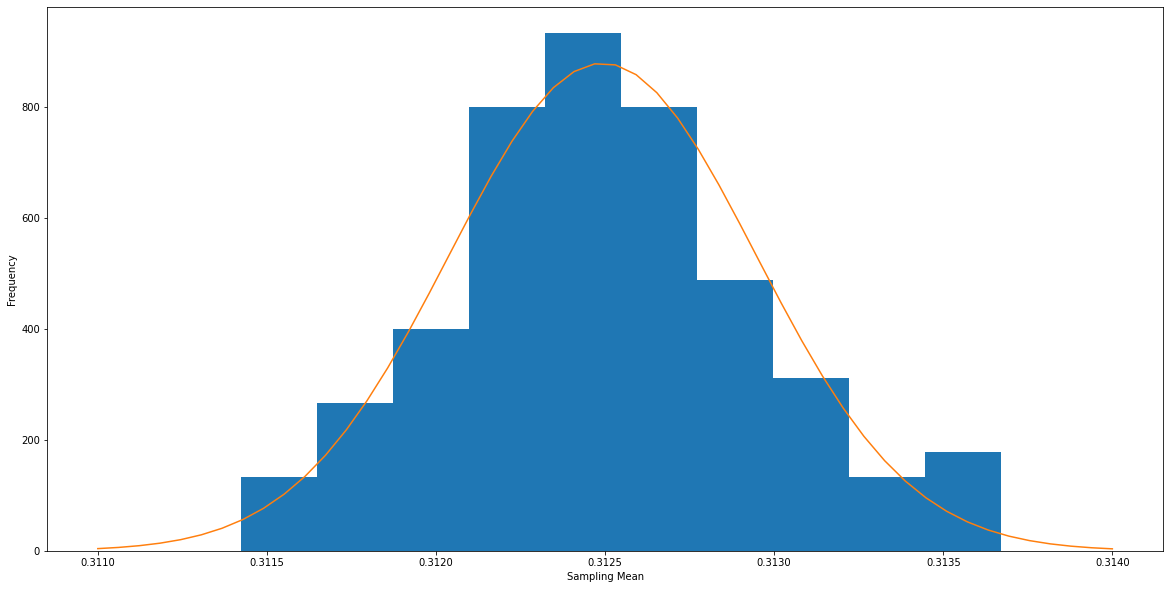

In [184]:
meanvar = np.array(meanvar)
plt.figure(figsize=(20,10))  
plt.hist(meanvar[:,0], density = True,bins = 10);
x1 = np.linspace(0.3110,0.3140)
plt.plot(x1, norm.pdf(x1, loc = np.array(meanvar[:,0]).mean(), scale = np.array(meanvar[:,0]).std()));
plt.xlabel("Sampling Mean")
plt.ylabel("Frequency")

##The ablove plot successfully Verifies our hypothesis that the sampling distribution of the sample mean should approach a Gaussian for large number of samples according to the "Central Limit Theorem"

### Part (viii)

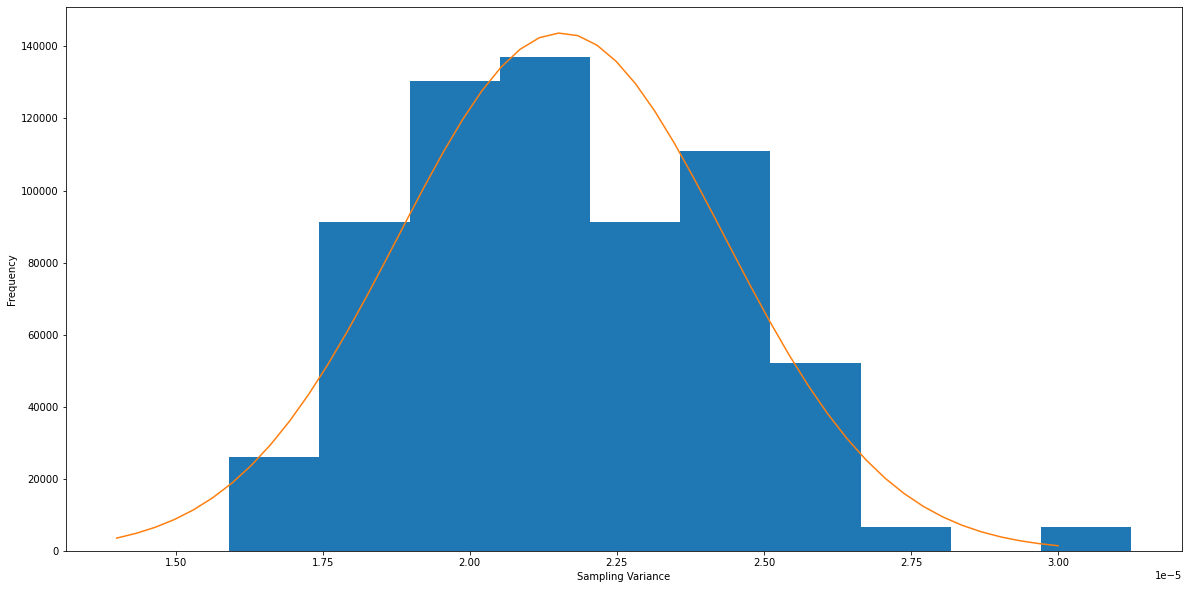

In [185]:
plt.figure(figsize=(20,10))  
plt.hist(meanvar[:,1], density  = True); #The range is x axis is (1.5,3)* 1e-5 , which implies that The sample Variance is extremely small.
x2 = np.linspace(0.000014,0.00003)
plt.plot(x2, norm.pdf(x2, loc = np.array(meanvar[:,1]).mean(), scale = np.array(meanvar[:,1]).std()));
plt.xlabel("Sampling Variance")
plt.ylabel("Frequency");

### From the above plot, it can be verified that, even the Sampling distribution of the sample variance also resembles a Gaussian and hence CLT is verified in this Case too!

# Thank You